# Task 2 : To Explore Supervised Machine Learning

### In supervised learning, we are given a data set and already know what our correct output should look like, having the idea that there is a relationship between the input and the output.
#### Supervised learning problems are categorized into "regression" and "classification" problems. In a regression problem, we are trying to predict results within a continuous output, meaning that we are trying to map input variables to some continuous function. In a classification problem, we are instead trying to predict results in a discrete output. In other words, we are trying to map input variables into discrete categories.
## In this task, we predict the percentage of marks that a student is expected to score based upon the number of hours they studied using linear regression.


In [183]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
# Reading the datset from link given
dataset_url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(dataset_url)
print("Dataset successfuly imported")

Dataset successfuly imported


In [120]:
# Exploring and preparing the dataset to use in our model
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


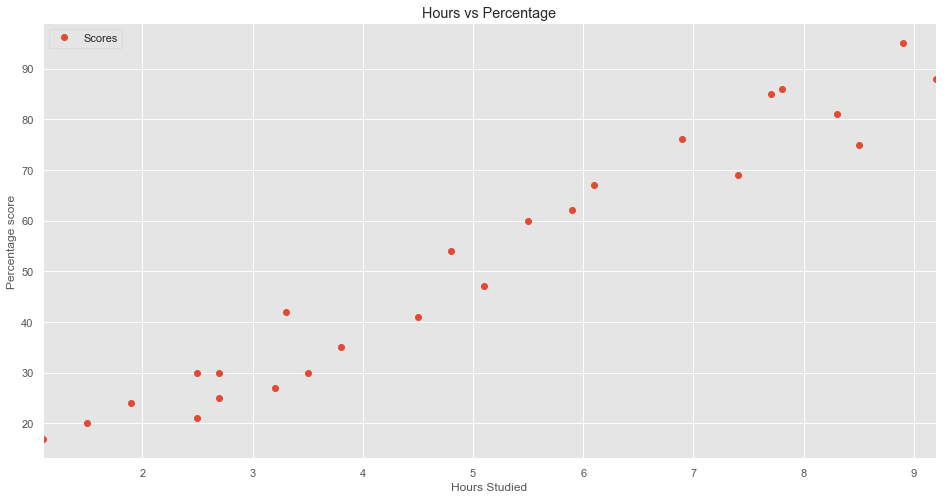

In [121]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage score')
plt.show()

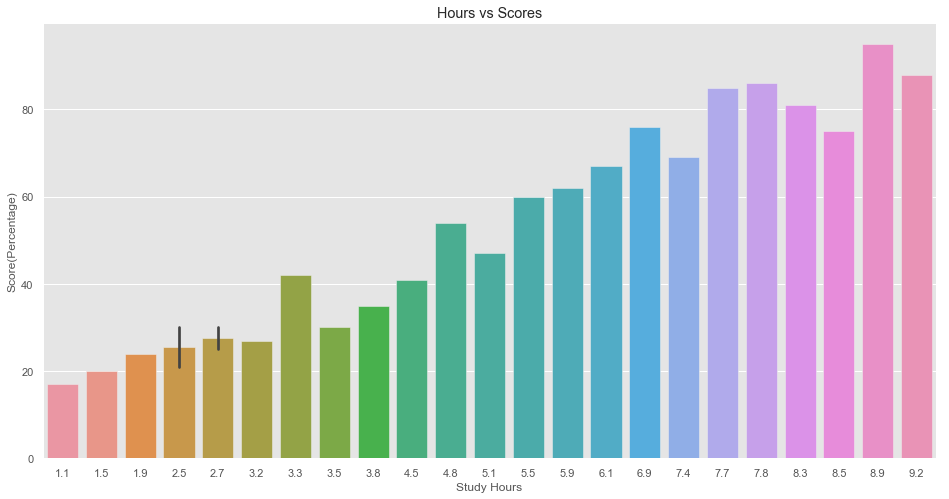

In [122]:
# Using Barplot to visualize the data
sns.set(rc={'figure.figsize':(16,8)})
plt.style.use('ggplot')
sns.barplot(x=data['Hours'],y=data['Scores'])
plt.title('Hours vs Scores')  
plt.xlabel('Study Hours')  
plt.ylabel('Score(Percentage)')
plt.show()

#### From the graph and barplot above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [156]:
# Preparing the data i.e. creating feature X and target Y
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [157]:
# checking the dataset information and getting it's desciption 
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [158]:
data.shape

(25, 2)

In [214]:
#splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [215]:
# checking the train and test data shape
X_train.shape, y_train.shape

((20, 1), (20,))

In [216]:
X_test.shape,y_test.shape

((5, 1), (5,))

## 1. Using Simple Linear Regression

In [217]:
# fiiting our model on the training dataset
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train)
print("Training complete!")

Training complete!


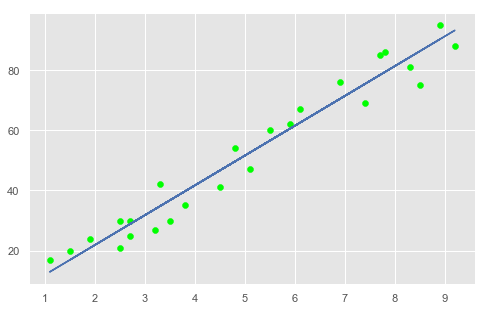

In [218]:
# Plotting the regression line
reg_line = reg.coef_* X + reg.intercept_

# Plotting reg_line for our data
plt.figure(figsize=(8,5))
plt.scatter(X, y,color="lime")
plt.plot(X, reg_line,color='b');
plt.show()

#### The above plot shows the best fitted line on our given dataset and the green points are our actual observations of dataset.

In [219]:
print('Intercept of given fitted line is:{}'.format(reg.intercept_))
print('Coefficient of x for given fiited line is:{}'.format(reg.coef_))

Intercept of given fitted line is:2.018160041434683
Coefficient of x for given fiited line is:[9.91065648]


### Prediction of Result Using test data:

In [220]:
#making Predictions
print(X_valid)    #test data in hours
y_pred = reg.predict(X_test) #predicting the score

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [221]:
#Comparing Original & Predicted data
df_comp = pd.DataFrame({'Original': y_test, 'Predicted': y_pred})  
df_comp

,Original,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Checking Accuracy of the Linear Regression Model:-

In [222]:
Accuracy=(reg.score(X_test, y_test))*100
print("Accuracy: ",Accuracy, "%")

Accuracy:  94.54906892105356 %


### Calculating the Mean Absolute Error and Root Mean Square Error:-

In [223]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Mean Absolute Error=", mae)
print("Root Mean Square Error=", rmse)

Mean Absolute Error= 4.183859899002975
Root Mean Square Error= 4.6474476121003665


## 2. Using Gradient Boosting:

In [224]:
# fiiting our model on the training dataset
import xgboost as xgb
my_model = xgb.XGBRegressor()
my_model.fit(X_train, y_train)
print("Training complete!")

Training complete!


In [225]:
#finding Accuracy
Accuracy=(my_model.score(X_test,y_test)) * 100
print("Accuracy: ",Accuracy,"%")

Accuracy:  69.571153089278 %


In [226]:
predictions = my_model.predict(X_test) #By using predict method, we predict the values for target variable

In [227]:
#Calculating the Mean Absolute Error and Root Mean Square Error
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test, predictions)
rmse=np.sqrt(mean_squared_error(y_test,predictions))
print("Mean Absolute Error=", mae)
print("Root Mean Square Error=", rmse)

Mean Absolute Error= 9.79848861694336
Root Mean Square Error= 10.980494660945146


In [233]:
#Comparing Original & Predicted data
df_compare = pd.DataFrame({'Original': y_test, 'Predicted': predictions})  
df_compare

,Original,Predicted
0,20,23.998695
1,27,41.997387
2,69,84.999840
3,30,21.001869
4,62,66.998390


### Generating the Result:

In [231]:
#Using Linear Regression
hours = float(input(' Enter the hours of study:- '))
predicted = reg.predict([[hours]])
print(" If a student studies for = {}".format(hours),"hours, then the predicted score is = {}%".format(predicted))

 Enter the hours of study:- 9.25
 If a student studies for = 9.25 hours, then the predicted score is = [93.69173249]%


#### We predicted the score by using predict method for our input i.e. 9.25 hours and we get the score i.e. 93.69

In [232]:
#Using Extreme Gradient Boosting
hours = float(input(' Enter the hours of study:- '))
predicted = my_model.predict(hours)
print(" If a student studies for = {}".format(hours),"hours, then the predicted score is = {}%".format(predicted))

 Enter the hours of study:- 9.25
 If a student studies for = 9.25 hours, then the predicted score is = [88.000465]%


#### We predicted the score by using predict method for our input i.e. 9.25 hours and we get the score i.e. 88.0